Initialize pandas to read the CSV

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path: data.ipynb
operating_data = pd.read_csv('fy24-adopted-operating-budget.csv')
operating_data.head()



,Cabinet,Dept,Program,Expense Category,FY21 Actual Expense,FY22 Actual Expense,FY23 Appropriation,FY24 Adopted
0,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1820538.46,1624903.69,1584054.209,1921403.81
1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,127557.82,284597.9,99314,219633.42
2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,27318.17,28541.55,44938,55573.65
3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,11365.77,19410.3,29630,16734.29
4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,39040.6,16164.36,24900,36115


In [148]:
# Code to replace the #Missing values with 0
operating_data = operating_data.replace("#Missing", 0)

# Changes columns to numeric
columns_to_convert = ['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted']

for column in columns_to_convert:
    operating_data[column] = pd.to_numeric(operating_data[column], errors='coerce')

operating_data.head()

,Cabinet,Dept,Program,Expense Category,FY21 Actual Expense,FY22 Actual Expense,FY23 Appropriation,FY24 Adopted
0,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1820538.46,1624903.69,1584054.209,1921403.81
1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,127557.82,284597.90,99314.000,219633.42
2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,27318.17,28541.55,44938.000,55573.65
3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,11365.77,19410.30,29630.000,16734.29
4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,39040.60,16164.36,24900.000,36115.00


In [149]:
# Group by department and sum the expenses for each department
department_spending = operating_data.groupby('Dept').agg({
    'FY21 Actual Expense': 'sum',
    'FY22 Actual Expense': 'sum',
    'FY23 Appropriation': 'sum',
    'FY24 Adopted': 'sum'
}).reset_index()

department_spending.head()

,Dept,FY21 Actual Expense,FY22 Actual Expense,FY23 Appropriation,FY24 Adopted
0,Age Strong,3883951.65,4223184.72,6.045810e+06,7.941771e+06
1,Annual Audit Costs,142850.00,708203.00,7.500000e+05,7.500000e+05
2,Assessing Department,7347192.74,7280560.90,8.283326e+06,8.471223e+06
3,Auditing Department,3132301.28,3045162.77,3.275482e+06,3.697096e+06
4,Black Male Advancement,0.00,0.00,1.803768e+06,1.804455e+06


In [150]:
# Group by department and sum the expenses for each department
program_spending = operating_data.groupby('Program').agg({
    'FY21 Actual Expense': 'sum',
    'FY22 Actual Expense': 'sum',
    'FY23 Appropriation': 'sum',
    'FY24 Adopted': 'sum'
}).reset_index()

program_spending.head()

,Program,FY21 Actual Expense,FY22 Actual Expense,FY23 Appropriation,FY24 Adopted
0,A&F,3687808.46,2390173.76,2.648553e+06,1.685875e+06
1,ASSET,22454138.76,22924001.57,2.904438e+07,3.582730e+07
2,Accounting,965587.39,725972.27,8.150667e+05,9.683224e+05
3,Accounting/Quality Control,397541.86,354427.68,3.551537e+05,3.681690e+05
4,Accounts Payable,669400.51,699995.72,8.378097e+05,8.499146e+05


In [151]:
# Group by department and sum the expenses for each department
category_spending = operating_data.groupby('Expense Category').agg({
    'FY21 Actual Expense': 'sum',
    'FY22 Actual Expense': 'sum',
    'FY23 Appropriation': 'sum',
    'FY24 Adopted': 'sum'
}).sum(axis=1).reset_index()

# Rename the column to reflect the total
category_spending.rename(columns={0: 'Total Expense'}, inplace=True)

category_spending.head()

,Expense Category,Total Expense
0,Contractual Services,1.877879e+09
1,Current Charges & Obligations,1.069250e+09
2,Equipment,1.383600e+08
3,Fixed Expenses,0.000000e+00
4,Other Expenses,1.259540e+09


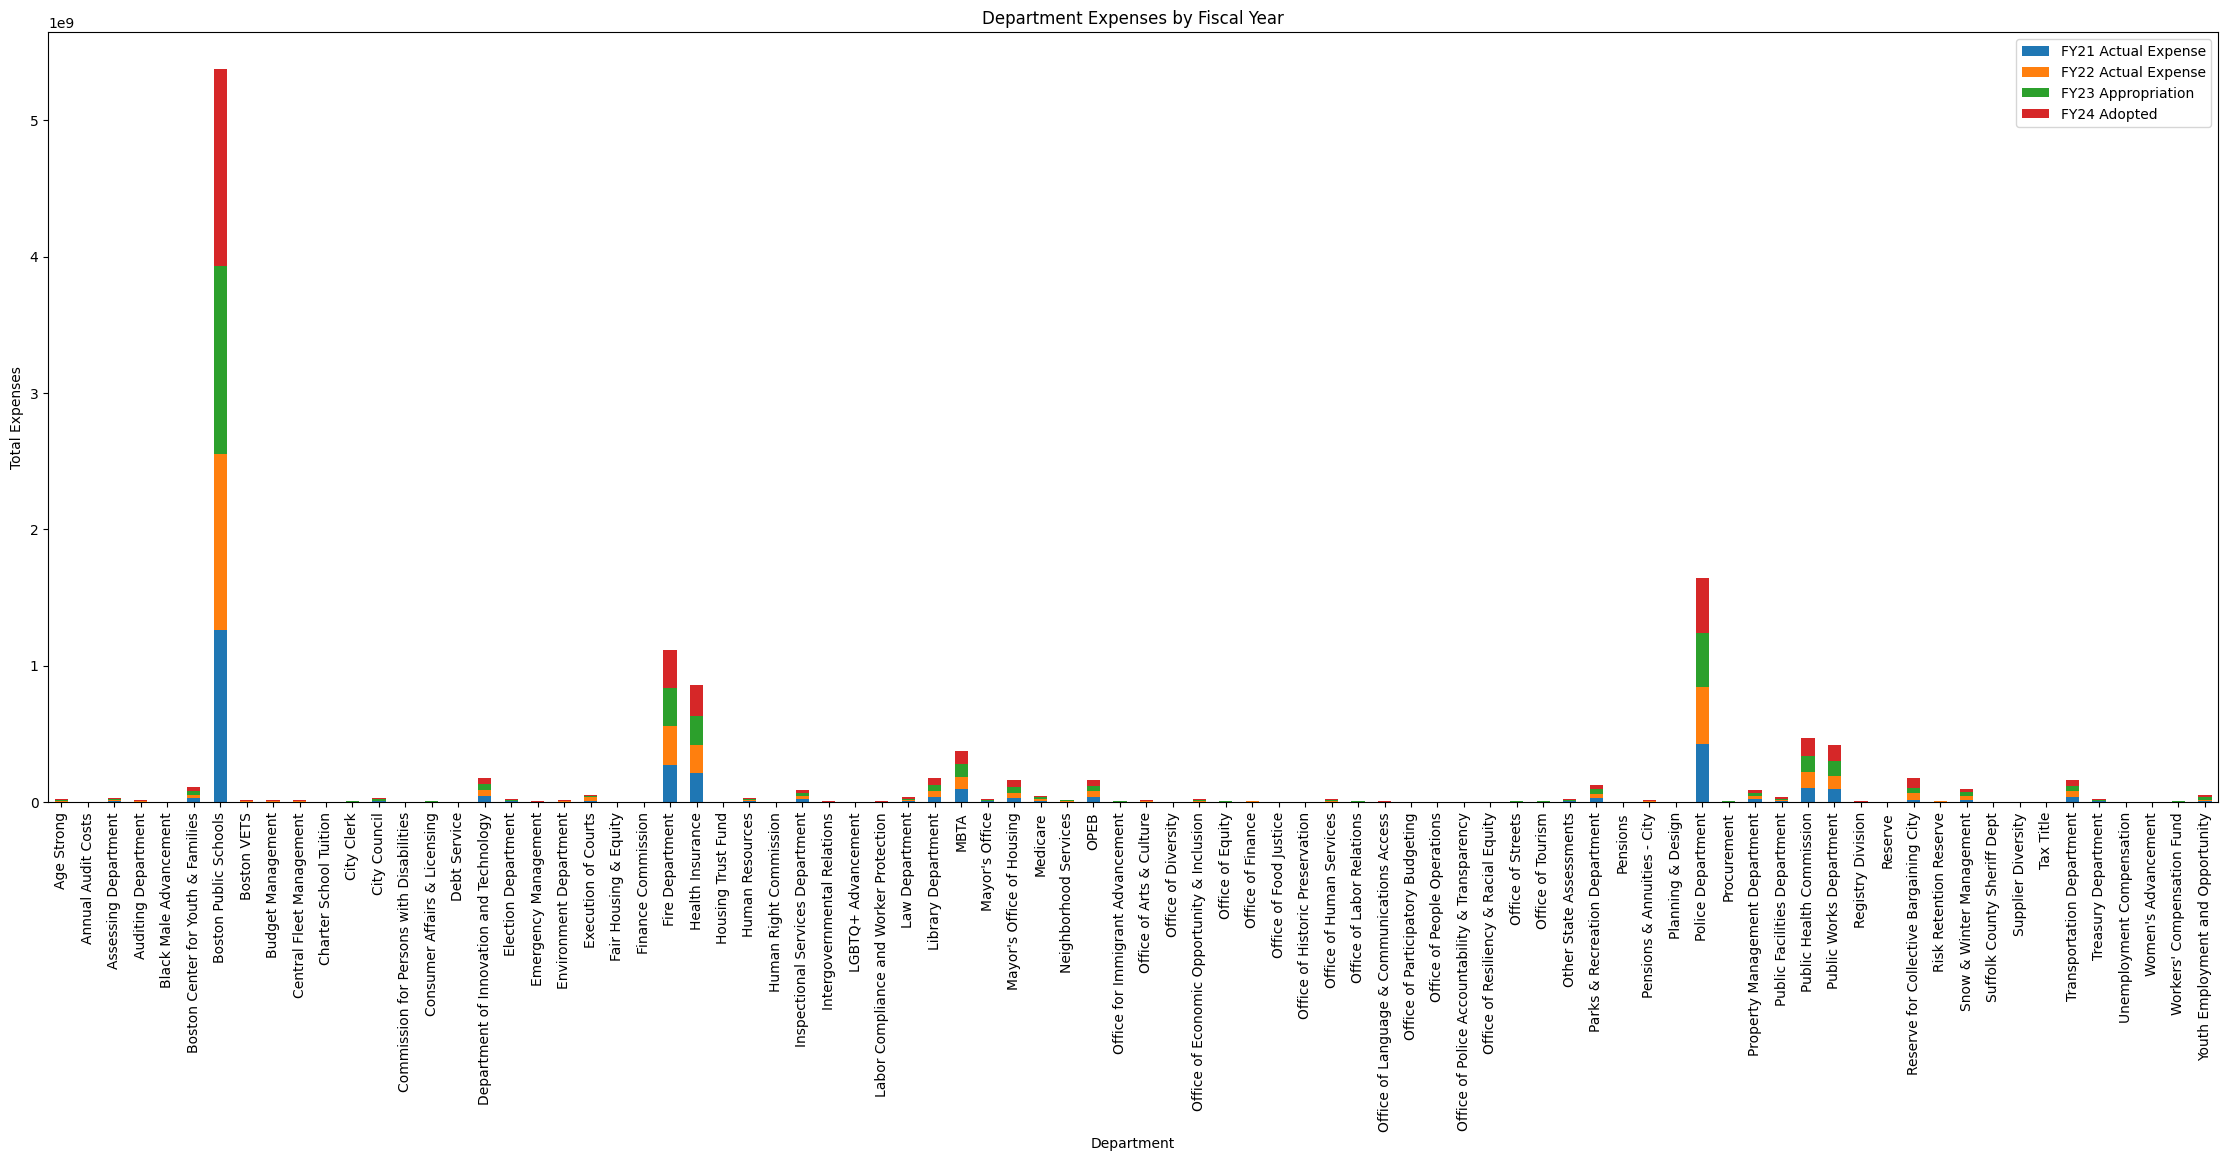

In [152]:
ax = department_spending.plot(x='Dept', kind='bar', stacked=True, figsize=(28, 10))
plt.title('Department Expenses by Fiscal Year')
plt.xlabel('Department')
plt.ylabel('Total Expenses')

# Show the plot
plt.show()

Dept
Boston Public Schools                      1.260465e+09
Police Department                          4.229175e+08
Fire Department                            2.689599e+08
Health Insurance                           2.109008e+08
Public Health Commission                   1.064735e+08
Public Works Department                    9.415263e+07
MBTA                                       9.334511e+07
Department of Innovation and Technology    4.122373e+07
OPEB                                       4.000000e+07
Library Department                         3.984132e+07
Name: FY21 Actual Expense, dtype: float64


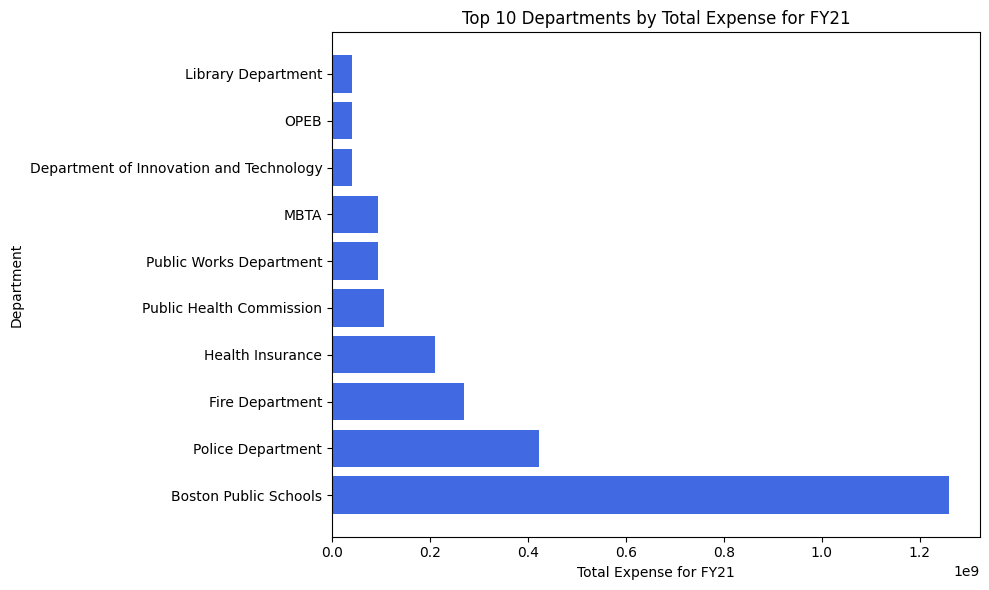

In [178]:
spending_by_department_operational = operating_data.groupby('Dept')['FY21 Actual Expense'].sum().sort_values(ascending=False)

top_10 = spending_by_department_operational.head(10)
print(top_10)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the top 10 departments with the highest total expenses
ax.barh(top_10.index, top_10, color='royalblue')
ax.set_xlabel('Total Expense for FY21')
ax.set_ylabel('Department')
ax.set_title('Top 10 Departments by Total Expense for FY21')

plt.tight_layout()  # Ensure proper spacing
plt.show()

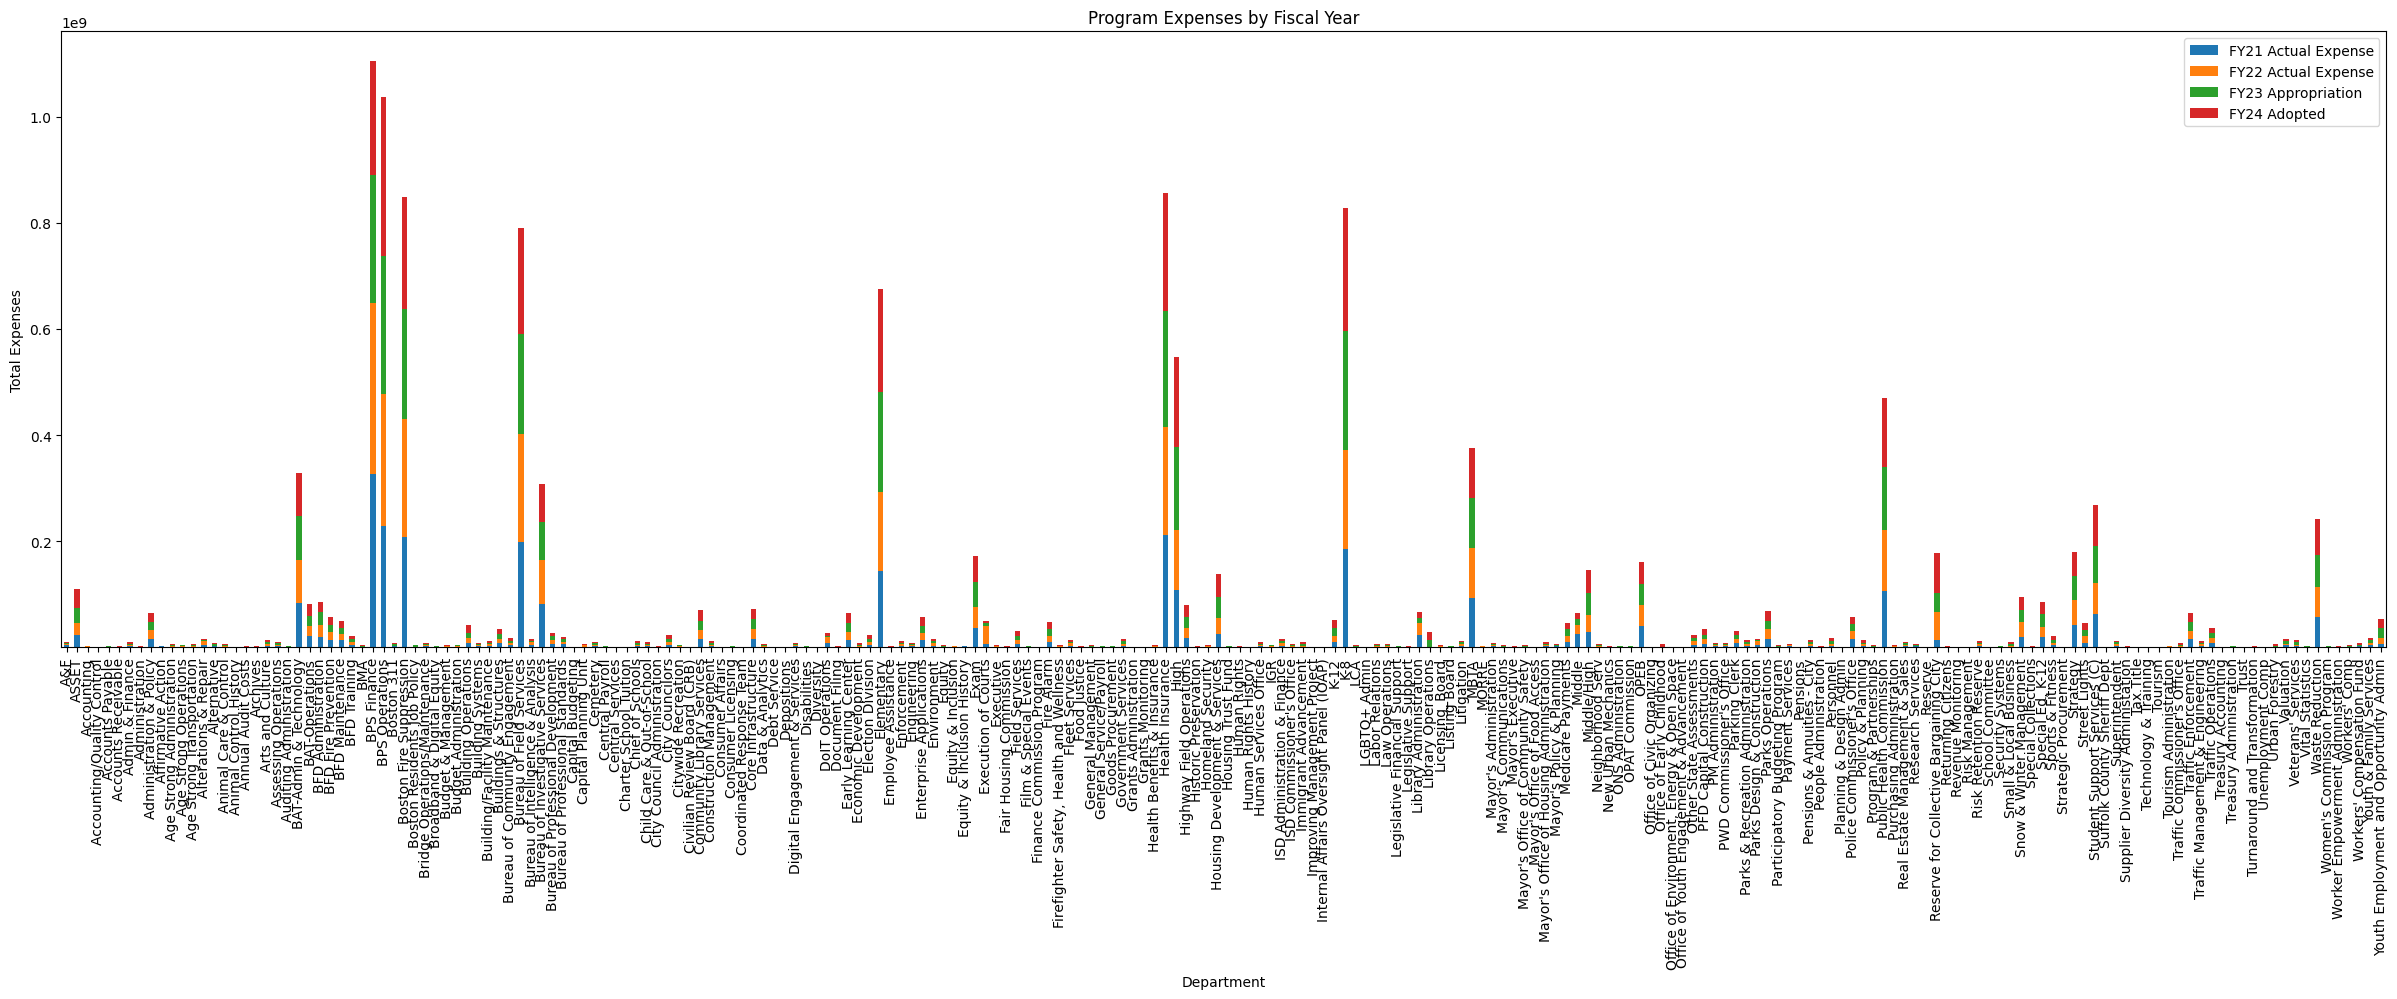

In [174]:
ax = program_spending.plot(x='Program', kind='bar', stacked=True, figsize=(30, 8))
plt.title('Program Expenses by Fiscal Year')
plt.xlabel('Department')
plt.ylabel('Total Expenses')

# Show the plot
plt.show()

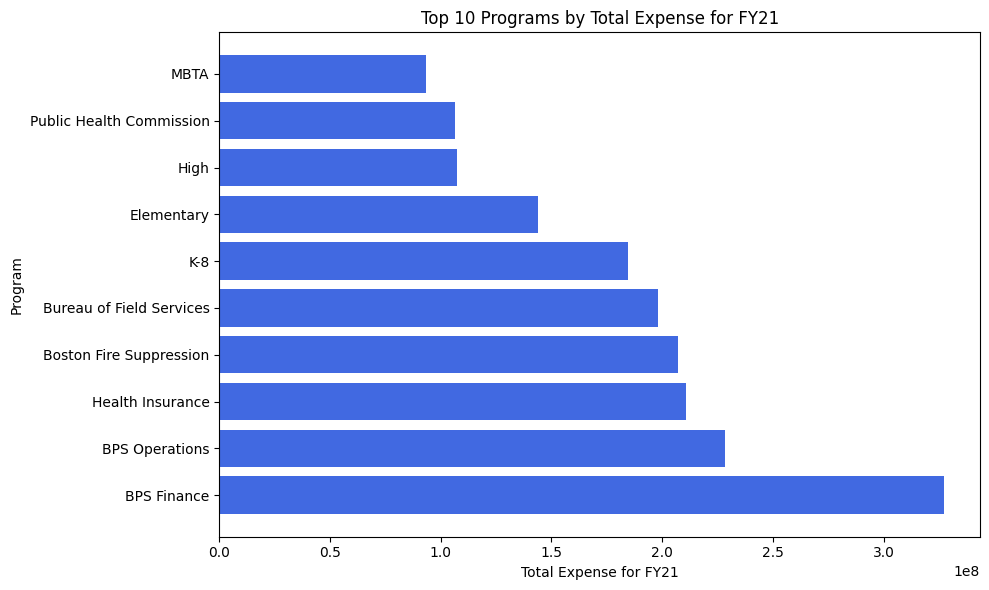

In [179]:
spending_by_program_operational = operating_data.groupby('Program')['FY21 Actual Expense'].sum().sort_values(ascending=False)

top_10 = spending_by_program_operational.head(10)
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the top 10 departments with the highest total expenses
ax.barh(top_10.index, top_10, color='royalblue')
ax.set_xlabel('Total Expense for FY21')
ax.set_ylabel('Program')
ax.set_title('Top 10 Programs by Total Expense for FY21')

plt.tight_layout()  # Ensure proper spacing
plt.show()

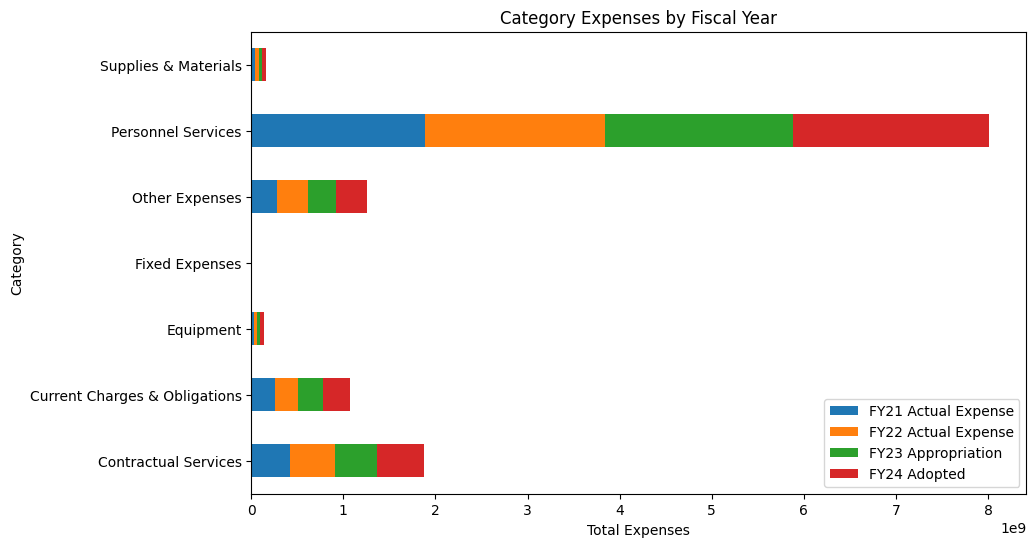

In [109]:
ax = category_spending.plot(x='Expense Category', kind='barh', stacked=True, figsize=(10, 6))
plt.title('Category Expenses by Fiscal Year')
plt.xlabel('Total Expenses')
plt.ylabel('Category')

# Show the plot
plt.show()

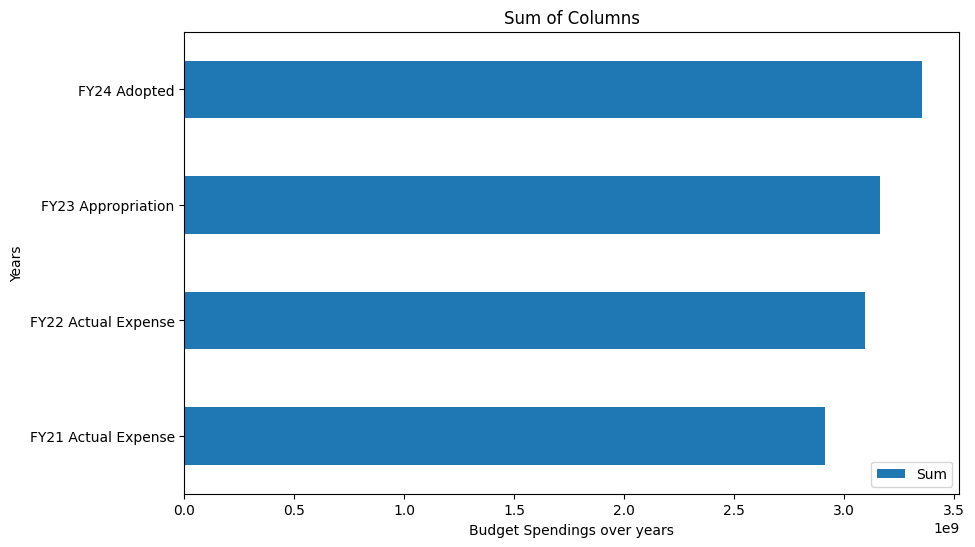

In [137]:
sum_fy21 = operating_data['FY21 Actual Expense'].sum()
sum_fy22 = operating_data['FY22 Actual Expense'].sum()
sum_fy23 = operating_data['FY23 Appropriation'].sum()
sum_fy24 = operating_data['FY24 Adopted'].sum()


category_spending = pd.DataFrame({
    'Column': ['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted'],
    'Sum': [sum_fy21, sum_fy22, sum_fy23, sum_fy24]
})

ax = category_spending.plot(x='Column', kind='barh', stacked=True, figsize=(10, 6))

plt.xlabel('Budget Spendings over years')
plt.ylabel('Years')
plt.title('Sum of Columns')
plt.show()

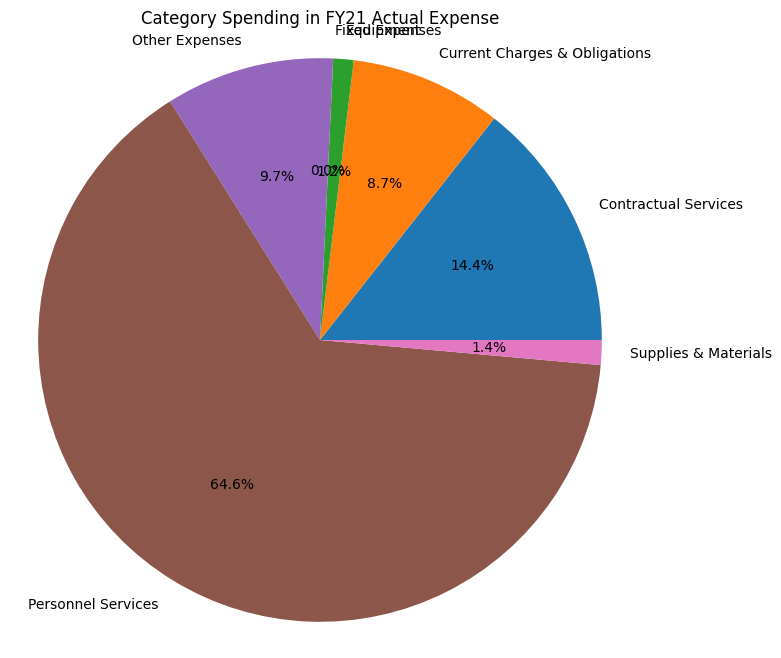

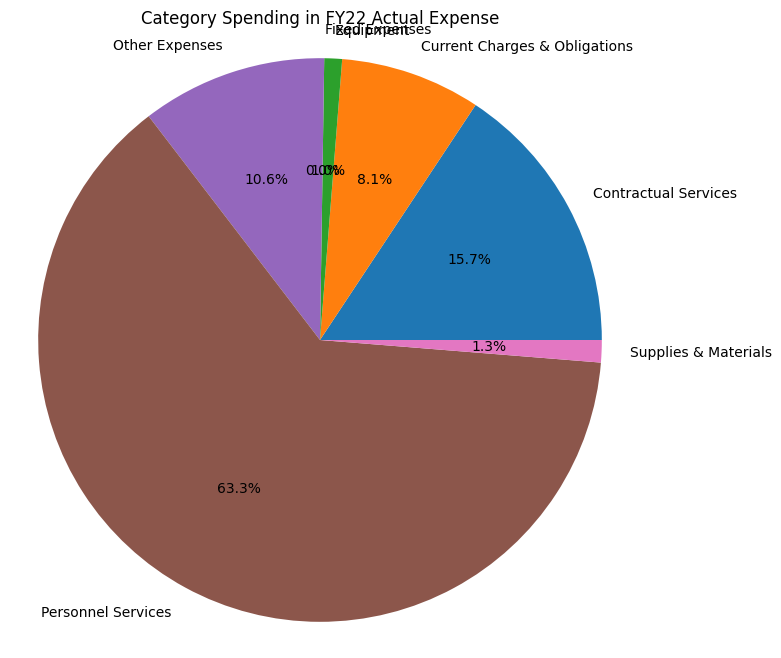

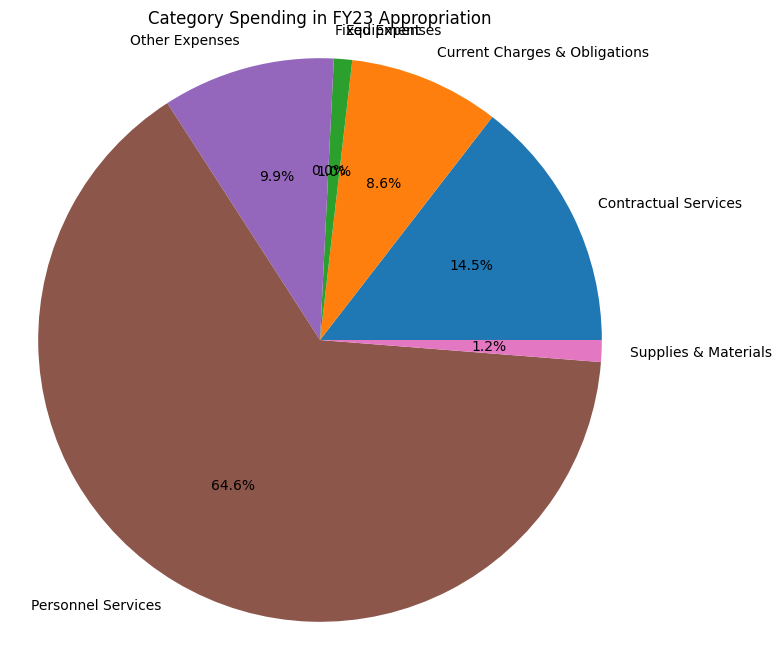

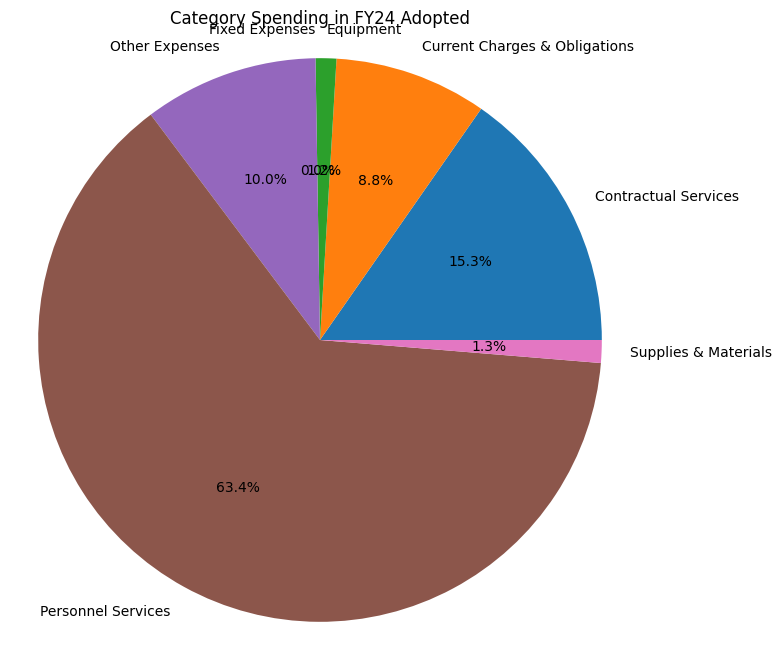

In [110]:
years = ['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted']

# Create a pie chart for each year
for year in years:
    plt.figure(figsize=(8, 8))
    plt.pie(category_spending[year], labels=category_spending['Expense Category'], autopct='%1.1f%%')
    plt.title(f'Category Spending in {year}')
    plt.axis('equal')

    plt.show()

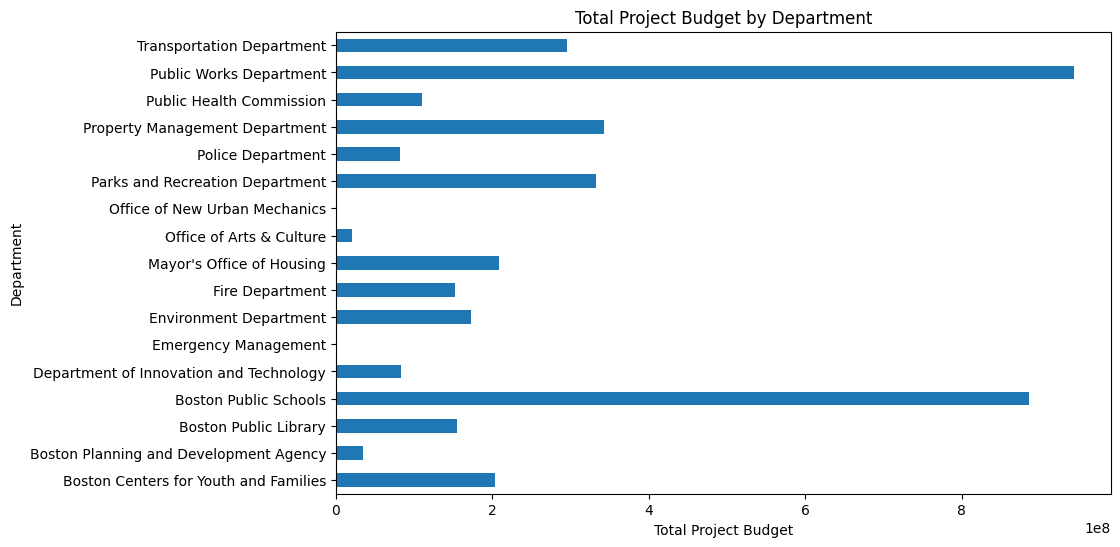

In [121]:
capital_data = pd.read_csv('fy24-capital-budget-plan-recommended.csv')

# Changes columns to numeric
columns_to_convert = ['Total_Project_Budget']

# Use pd.to_numeric to convert the selected columns to numeric
capital_data[columns_to_convert] = capital_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

department_budget = capital_data.groupby('Department')['Total_Project_Budget'].sum()


ax = department_budget.plot(kind='barh', figsize=(10, 6))
ax.set_xlabel('Total Project Budget')
ax.set_ylabel('Department')
ax.set_title('Total Project Budget by Department')
plt.show()

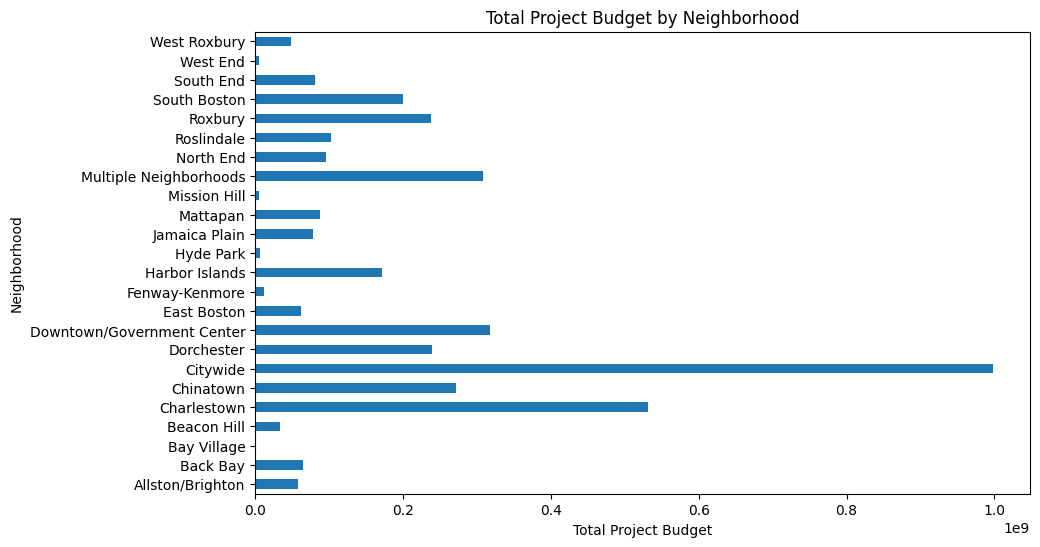

In [123]:
neighborhood_budget = capital_data.groupby('Neighborhood')['Total_Project_Budget'].sum()

ax = neighborhood_budget.plot(kind='barh', figsize=(10, 6))
ax.set_xlabel('Total Project Budget')
ax.set_ylabel('Neighborhood')
ax.set_title('Total Project Budget by Neighborhood')
plt.show()